# Case Study 4: Classifying Whiskies

## 4.1.1: Getting Started with Pandas

In [1]:
import pandas as pd 

x = pd.Series([6,3,8,6])

x

0    6
1    3
2    8
3    6
dtype: int64

In [4]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])

x[["w", "q"]]


w    3
q    6
dtype: int64

In [6]:
age = {"Tim":23, "Kim":25, "Jim":27}

y = pd.Series(age)

y

Tim    23
Kim    25
Jim    27
dtype: int64

In [7]:
sorted(x.index)

['e', 'q', 'r', 'w']

In [8]:
x.reindex(sorted(x.index))

e    8
q    6
r    6
w    3
dtype: int64

## 4.1.2: Loading and Inspecting Data

In [13]:
import numpy as np
import pandas as pd 

whisky = pd.read_csv("(CS-4)whiskies.txt")

whisky["Region"] = pd.read_csv("(CS-4)regions.txt")

whisky.head()

RowID Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  \
0      1  Aberfeldy     2          2      2          0        0      2      1   
1      2   Aberlour     3          3      1          0        0      4      3   
2      3     AnCnoc     1          3      2          0        0      2      0   
3      4     Ardbeg     4          1      4          4        0      0      2   
4      5    Ardmore     2          2      2          0        0      1      1   

   Winey  Nutty  Malty  Fruity  Floral     Postcode   Latitude   Longitude  \
0      2      2      2       2       2   \tPH15 2EB     286580      749680   
1      2      2      3       3       2   \tAB38 9PJ     326340      842570   
2      0      2      2       3       2    \tAB5 5LI     352960      839320   
3      0      1      2       1       0   \tPA42 7EB     141560      646220   
4      1      2      3       1       1   \tAB54 4NH     355350      829140   

      Region  
0  Highlands  
1   Speyside  
2  Highlands  
3      Islay  
4  Highlands

In [15]:
flavors = whisky.iloc[:, 2:14]

flavors

Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  Winey  Nutty  \
0      2          2      2          0        0      2      1      2      2   
1      3          3      1          0        0      4      3      2      2   
2      1          3      2          0        0      2      0      0      2   
3      4          1      4          4        0      0      2      0      1   
4      2          2      2          0        0      1      1      1      2   
..   ...        ...    ...        ...      ...    ...    ...    ...    ...   
81     1          1      1          0        0      1      0      0      1   
82     2          3      2          0        0      2      2      1      1   
83     0          3      1          0        0      2      2      1      1   
84     2          2      1          0        0      1      0      1      2   
85     2          3      0          0        1      0      2      1      1   

    Malty  Fruity  Floral  
0       2       2       2  
1       3       3       2  
2       2       3       2  
3       2       1       0  
4       3       1       1  
..    ...     ...     ...  
81      2       2       2  
82      2       0       1  
83      2       1       2  
84      1       0       0  
85      2       2       1  

[86 rows x 12 columns]

## 4.1.3: Exploring Correlations

In [16]:
corr_flavors = pd.DataFrame.corr(flavors)
corr_flavors

Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     Winey     Nutty     Malty    Fruity    Floral  
Body       0.188500  0.408576  0.126323 -0.116859 -0.013205 -0.461203  
Sweetness -0.054200  0.115727 -0.032493 -0.001516  0.019820  0.144987  
Smoky      0.231745 -0.028190 -0.023132 -0.192875 -0.312970 -0.431663  
Medicinal  0.044903 -0.202651 -0.113671 -0.258959 -0.330975 -0.511323  
Tobacco    0.054068  0.009097 -0.117717 -0.059347 -0.235145 -0.212375  
Honey      0.139563  0.362021  0.188492  0.310184  0.108822  0.183029  
Spicy      1.000000  0.092704 -0.042856  0.036303  0.144714  0.034663  
Winey      0.092704  1.000000  0.198467  0.112368  0.090694 -0.126932  
Nutty     -0.042856  0.198467  1.000000  0.066157  0.071765  0.018302  
Malty      0.036303  0.112368  0.066157  1.000000  0.207288  0.106309  
Fruity     0.144714  0.090694  0.071765  0.207288  1.000000  0.262336  
Floral     0.034663 -0.126932  0.018302  0.106309  0.262336  1.000000

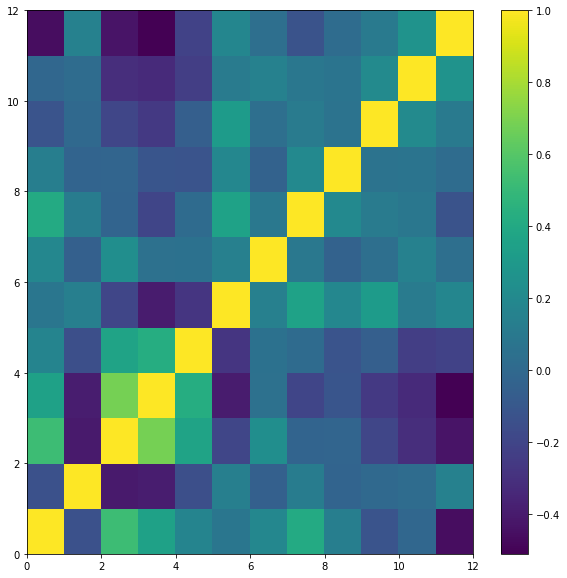

In [17]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flvors.pdf")

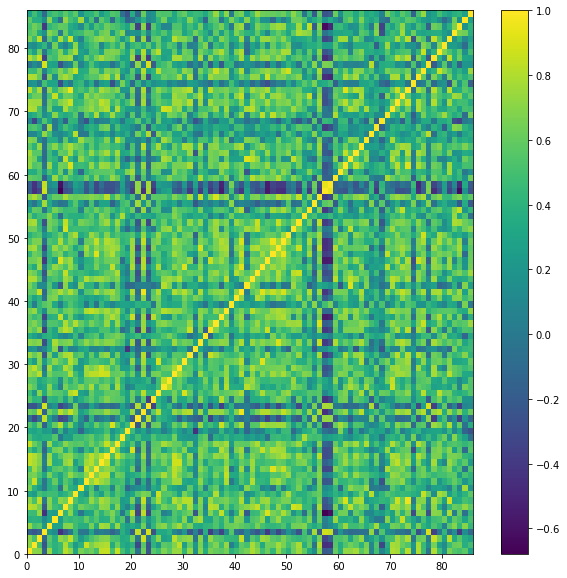

In [20]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.colorbar()
plt.axis("tight")
plt.savefig("corr_whisky.pdf")

## 4.1.4: Clustering Whiskies By Flavor Profile

In [24]:
from sklearn.cluster.bicluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
model.rows_

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False,  True, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, Fals

In [25]:
np.sum(model.rows_, axis=1)

array([ 5, 20, 19,  6, 19, 17])

In [26]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
model.row_labels_

array([2, 4, 5, 3, 2, 1, 5, 4, 2, 5, 4, 1, 2, 1, 2, 2, 1, 2, 1, 0, 5, 3,
       5, 3, 5, 5, 4, 4, 5, 4, 5, 2, 1, 1, 1, 2, 4, 5, 1, 0, 1, 5, 4, 4,
       4, 1, 2, 1, 1, 5, 5, 4, 4, 4, 1, 0, 2, 3, 3, 1, 5, 2, 4, 2, 2, 4,
       0, 2, 0, 1, 4, 2, 1, 2, 4, 2, 5, 3, 2, 5, 1, 5, 4, 1, 4, 1])

## 4.1.5: Comparing Correlation Matrices

In [31]:
whisky['Group'] = pd.Series(model.row_labels_, index = whisky.index)

whisky = whisky.iloc[np.argsort(model.row_labels_)]

whisky = whisky.reset_index(drop = True)

correlations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())

correlations = np.array(correlations)


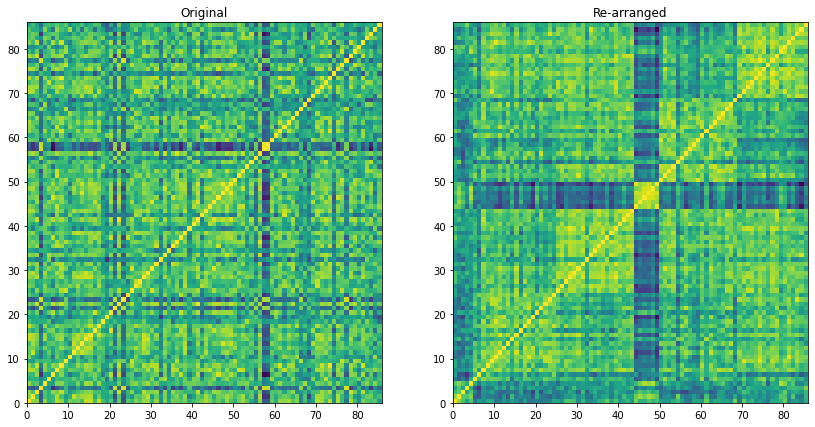

In [32]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Re-arranged")
plt.axis("tight")
plt.savefig("Correlations.pdf")